In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm

In [3]:
#var measure investment risk of portfolio

#portfolio

shares_MSFT = 1000
price = yf.Ticker('MSFT')

In [4]:
price_MSFT = price.history().tail(1)['Close'][0]

In [5]:
price_MSFT

369.8500061035156

In [6]:
value_MSFT = shares_MSFT * price_MSFT

In [9]:
value_MSFT

369850.0061035156

In [7]:
#4 weeks treasury bill rate
rfr_MSFT = 5.29

In [8]:
#4 weeks volatility rate
vol_MSFT = 0.2460

## Simulations
1. period
2. 

In [10]:
t_MSFT = 21/252

In [11]:
simulations = 50000

<AxesSubplot:ylabel='Count'>

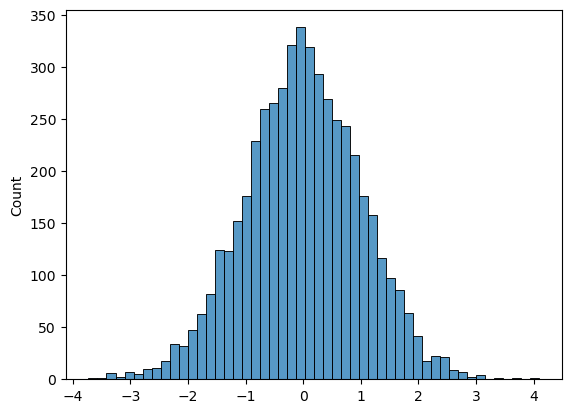

In [23]:
sns.histplot(norm.ppf(np.random.rand(5000)))

In [35]:
def VaR(pv,rfr,vol,t,simulations):
    end_value= pv*np.exp((rfr-0.5*np.square(vol)) * t + np.random.standard_normal(simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

In [37]:
returns_MSFT = VaR(value_MSFT,rfr_MSFT,vol_MSFT,t_MSFT,50000)

<AxesSubplot:ylabel='Count'>

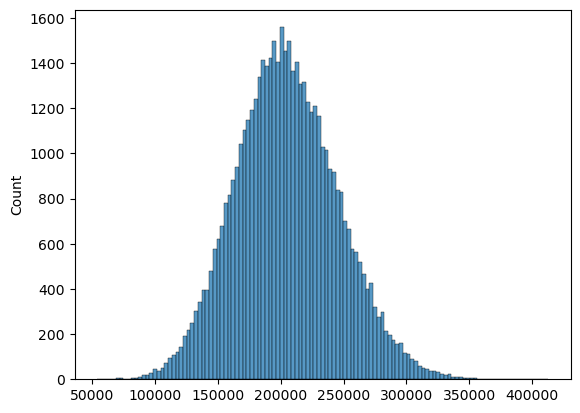

In [39]:
sns.histplot(returns_MSFT)

VaR at 90% confidence level: $153,757
VaR at 95% confidence level: $140,157
VaR at 99% confidence level: $115,815


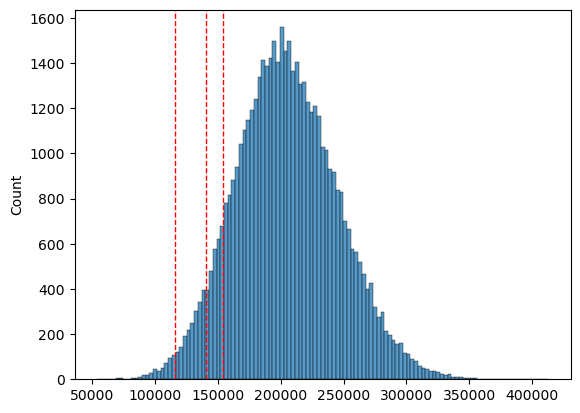

In [41]:
sns.histplot(returns_MSFT)
alpha = [10,5,1]

for i in alpha:
    confidence = (100-i)/100
    value = np.percentile(returns_MSFT,i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)